<a href="https://colab.research.google.com/github/AabidMK/RealtyAI_Infosys_Internship_Aug2025/blob/Sarayu-Narra/EDA_on_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nbformat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')
sns.set_context("talk")

In [ ]:
from google.colab import files

print("📂 Upload your Zillow .ipynb file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("✅ Uploaded:",filename)

📂 Upload your Zillow .ipynb file:


Saving zillow_dataset.ipynb to zillow_dataset (3).ipynb
✅ Uploaded: zillow_dataset (3).ipynb


In [ ]:
import json

# Load the notebook JSON
with open(filename, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Extract all code cells
code_cells = [cell['source'] for cell in nb.cells if cell.cell_type == 'code']
print(f"📖 Found {len(code_cells)} code cells in the notebook")

# Print first few lines to inspect (optional)
print("\nFirst few lines of the first code cell:")
print("\n".join(code_cells[0].split("\n")[:10]))

📖 Found 17 code cells in the notebook

First few lines of the first code cell:
import pandas as pd
import numpy as np


In [ ]:
# Load Zillow State Time Series dataset exactly as in your original notebook
import pandas as pd
import numpy as np

# The file was already uploaded in a previous cell, so no need to call files.upload() again.
# from google.colab import files
# uploaded = files.upload()

# Load raw data - assuming the uploaded zip file is actually a CSV
df = pd.read_csv('/content/State_time_series.csv (1).zip')

# Parse dates and sort
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(['RegionName', 'Date']).reset_index(drop=True)

# Keep main analysis columns
df = df[['Date', 'RegionName', 'ZHVI_AllHomes']].copy()

# Handle missing values (interpolation by region)
df['ZHVI_AllHomes'] = df.groupby('RegionName')['ZHVI_AllHomes'].transform(
    lambda x: x.interpolate(method='linear').ffill().bfill()
)

print("✅ Zillow dataset loaded and cleaned!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

✅ Zillow dataset loaded and cleaned!
Shape: (13212, 3)
Columns: ['Date', 'RegionName', 'ZHVI_AllHomes']


,Date,RegionName,ZHVI_AllHomes
0,1996-04-30,Alabama,79500.0
1,1996-05-31,Alabama,79200.0
2,1996-06-30,Alabama,79500.0
3,1996-07-31,Alabama,79700.0
4,1996-08-31,Alabama,79700.0


In [ ]:
# Basic structure
print("Data Loaded Successfully!")
print(f"Shape of dataset: {df.shape}")
print("\nColumns:\n", df.columns)

# Overview
df.info()
print("\nSummary Statistics:")
display(df.describe())

# Preview first few rows
display(df.head())

Data Loaded Successfully!
Shape of dataset: (13212, 3)

Columns:
 Index(['Date', 'RegionName', 'ZHVI_AllHomes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           13212 non-null  datetime64[ns]
 1   RegionName     13212 non-null  object        
 2   ZHVI_AllHomes  12856 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 309.8+ KB

Summary Statistics:


,Date,ZHVI_AllHomes
count,13212,12856.000000
mean,2007-05-02 04:44:54.277928960,170654.970442
min,1996-04-30 00:00:00,38200.000000
25%,2001-11-30 00:00:00,114000.000000
50%,2007-05-31 00:00:00,144900.000000
75%,2012-09-30 00:00:00,208200.000000
max,2017-12-31 00:00:00,620400.000000
std,NaN,84563.001410


,Date,RegionName,ZHVI_AllHomes
0,1996-04-30,Alabama,79500.0
1,1996-05-31,Alabama,79200.0
2,1996-06-30,Alabama,79500.0
3,1996-07-31,Alabama,79700.0
4,1996-08-31,Alabama,79700.0


In [ ]:
# Convert date column to datetime
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Removed as Date is already index
# df = df.sort_values('Date') # Removed this line as 'Date' is set as index next
# df = df.set_index('Date') # Date is already the index

# Check missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop rows with missing date or target variable
# df = df.dropna(subset=['Date']) # Removed this line
df = df.fillna(method='ffill')  # Forward fill

print("\nCleaned Dataset Shape:", df.shape)
display(df.head())

Missing Values:
RegionName         0
ZHVI_AllHomes    356
dtype: int64

Cleaned Dataset Shape: (13212, 2)


,RegionName,ZHVI_AllHomes
Date,,
1996-04-30,Alabama,79500.0
1996-04-30,Idaho,109300.0
1996-04-30,Pennsylvania,83300.0
1996-04-30,Hawaii,227400.0
1996-04-30,RhodeIsland,113600.0


Numeric Columns: ['ZHVI_AllHomes']


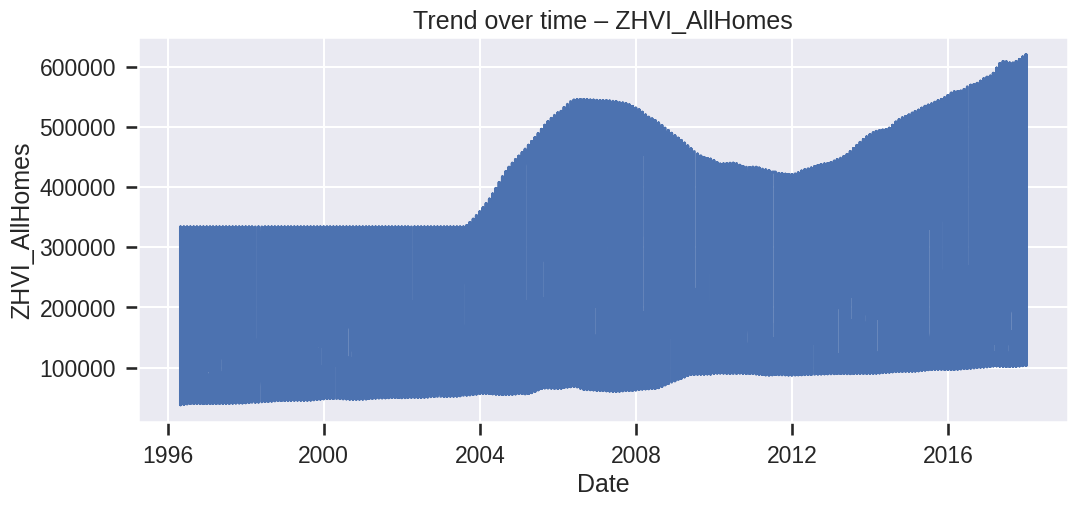

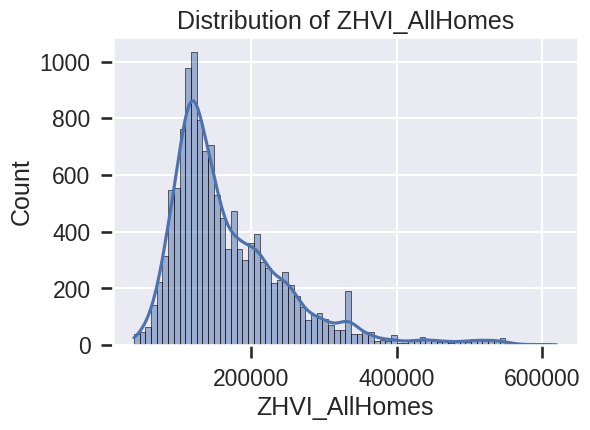

In [ ]:
# Numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric Columns:", num_cols)

# Plot line charts for each numeric column
for col in num_cols:
    plt.figure(figsize=(12,5))
    plt.plot(df.index, df[col])
    plt.title(f"Trend over time – {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# Distribution
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

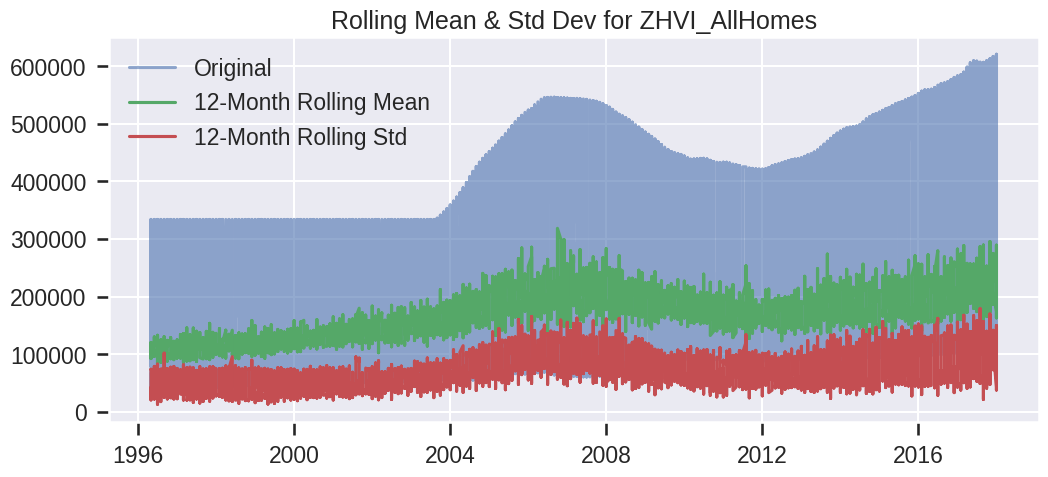

In [ ]:
for col in num_cols:
    plt.figure(figsize=(12,5))
    plt.plot(df[col], label='Original', alpha=0.6)
    plt.plot(df[col].rolling(window=12).mean(), label='12-Month Rolling Mean')
    plt.plot(df[col].rolling(window=12).std(), label='12-Month Rolling Std')
    plt.title(f"Rolling Mean & Std Dev for {col}")
    plt.legend()
    plt.show()

 Seasonal Decomposition for: ZHVI_AllHomes


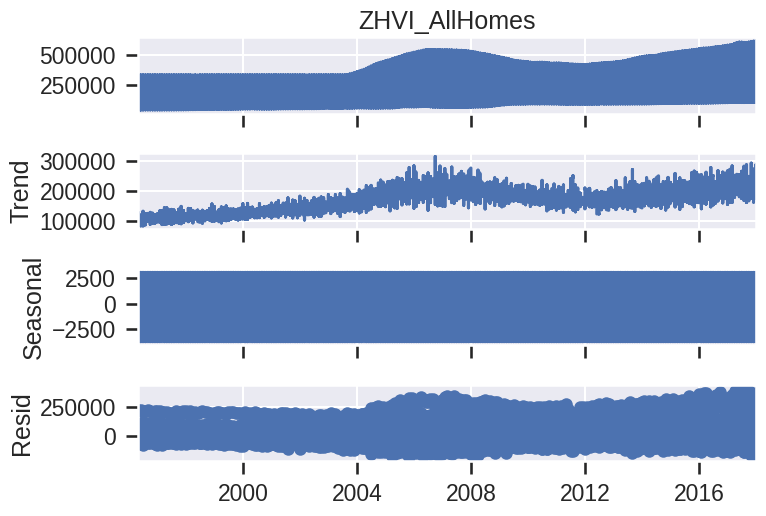

In [ ]:
for col in num_cols:
    print(f" Seasonal Decomposition for: {col}")
    result = seasonal_decompose(df[col], model='additive', period=12)
    result.plot()
    plt.show()

In [ ]:
def adf_test(series, col_name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {col_name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values: {result[4]}")
    if result[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is Non-Stationary")
    print("-"*50)

for col in num_cols:
    adf_test(df[col], col)

ADF Test for ZHVI_AllHomes
ADF Statistic: -5.7613
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.430846626804963), '5%': np.float64(-2.8617594853241517), '10%': np.float64(-2.5668868271289123)}
Series is Stationary
--------------------------------------------------


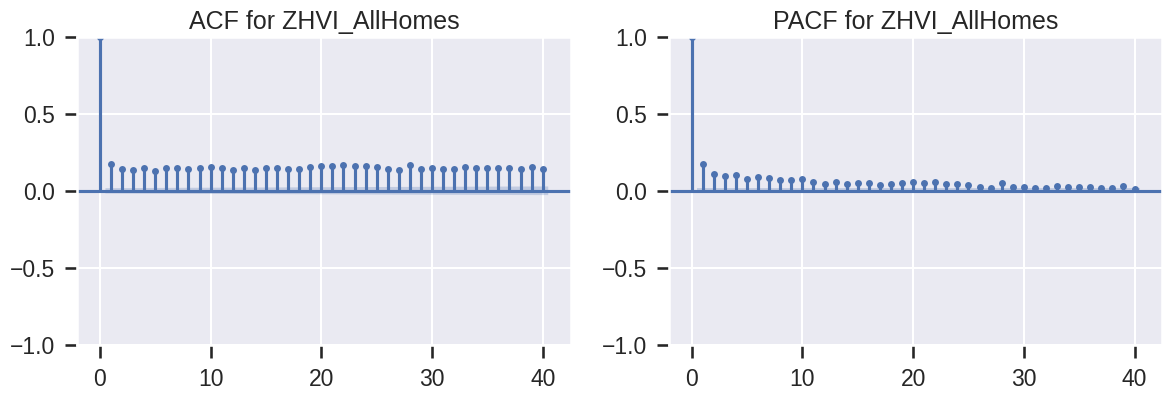

In [ ]:
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    plot_acf(df[col].dropna(), ax=ax[0], lags=40)
    plot_pacf(df[col].dropna(), ax=ax[1], lags=40)
    ax[0].set_title(f"ACF for {col}")
    ax[1].set_title(f"PACF for {col}")
    plt.show()

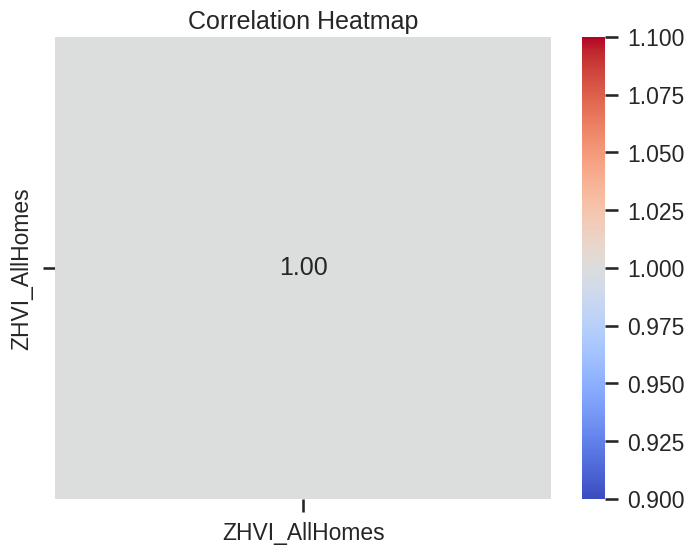

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Creating Streamlit Web App

In [ ]:
# Pivot the data so that each column is a state, rows are dates
ts_data = df.pivot(columns='RegionName', values='ZHVI_AllHomes')

# Fill missing values (forward fill/backfill)
ts_data = ts_data.fillna(method='ffill').fillna(method='bfill')

In [ ]:
# Time Series Forecasting Models
# Model 1: ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Example for California
california_data = ts_data['California']

# Fit ARIMA (simple example: order=(1,1,1))
model_arima = ARIMA(california_data, order=(1,1,1))
arima_result = model_arima.fit()
forecast_arima = arima_result.forecast(steps=12)  # Forecast 12 months
print(forecast_arima)

2018-01-31    525555.126348
2018-02-28    527005.898525
2018-03-31    528359.319043
2018-04-30    529621.920524
2018-05-31    530799.797230
2018-06-30    531898.634474
2018-07-31    532923.736070
2018-08-31    533880.049925
2018-09-30    534772.191927
2018-10-31    535604.468220
2018-11-30    536380.895995
2018-12-31    537105.222873
Freq: ME, Name: predicted_mean, dtype: float64


In [ ]:
# Model 2: Prophet
from prophet import Prophet

# Prepare data for Prophet
california_prophet = california_data.reset_index()
california_prophet.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(california_prophet)
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoa1dko16/_yxgnokq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoa1dko16/vjmfjdha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47260', 'data', 'file=/tmp/tmpoa1dko16/_yxgnokq.json', 'init=/tmp/tmpoa1dko16/vjmfjdha.json', 'output', 'file=/tmp/tmpoa1dko16/prophet_model89jz6zxv/prophet_model-20251007055114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Dump Models
import pickle

# Save ARIMA model
with open('arima_model_california.pkl', 'wb') as f:
    pickle.dump(arima_result, f)

# Save Prophet model
with open('prophet_model_california.pkl', 'wb') as f:
    pickle.dump(model_prophet, f)

In [ ]:
# Create Streamlit App
import streamlit as st
import pandas as pd
import pickle
from prophet.plot import plot_plotly

st.title("Zillow State Housing Forecast")

state = st.selectbox("Select State", ts_data.columns)

# Load models dynamically (example: only California for now)
arima_model = None
prophet_model = None

if state == 'California':
    try:
        with open('arima_model_california.pkl', 'rb') as f:
            arima_model = pickle.load(f)
        with open('prophet_model_california.pkl', 'rb') as f:
            prophet_model = pickle.load(f)
        st.success(f"Models loaded for {state}")
    except FileNotFoundError:
        st.error(f"Models not found for {state}. Please train the models first.")
else:
    st.info(f"Models are not available for {state}. Please select California to see forecasts.")


# Display forecasts if models are loaded
if arima_model is not None:
    # Display ARIMA forecast
    st.subheader("ARIMA Forecast")
    forecast_arima = arima_model.forecast(steps=12)
    st.line_chart(forecast_arima)

if prophet_model is not None:
    # Display Prophet forecast
    st.subheader("Prophet Forecast")
    # Prepare data for Prophet forecast plotting - need the original data for the selected state
    state_data_for_prophet = ts_data[state].reset_index()
    state_data_for_prophet.columns = ['ds','y']
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    forecast_prophet = prophet_model.predict(future)
    st.line_chart(forecast_prophet[['ds','yhat']].set_index('ds'))

2025-10-07 05:55:25.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 05:55:25.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 05:55:25.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 05:55:25.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 05:55:25.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 05:55:25.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 05:55:25.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 05:55:25.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# Install streamlit
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.0 MB/s eta 0:00:00
